# K邻近算法示例学习

示例数据来源: https://www.manning.com/books/machine-learning-in-action


### 1、实战背景

海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

1. 不喜欢的人
2. 魅力一般的人
3. 极具魅力的人
       
海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。datingTestSet.txt数据下载： 数据集下载

海伦收集的样本数据主要包含以下3种特征：

1. 每年获得的飞行常客里程数
2. 玩视频游戏所消耗时间百分比
3. 每周消费的冰淇淋公升数

数据集`datingTestSet.txt`内容如下：

```
40920	8.326976	0.953952	largeDoses
14488	7.153469	1.673904	smallDoses
26052	1.441871	0.805124	didntLike
75136	13.147394	0.428964	didntLike
38344	1.669788	0.134296	didntLike
72993	10.141740	1.032955	didntLike
...
```

### 1、数据处理

In [1]:
import numpy as np

'''
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力
 
Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
'''
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines, 3))
    # print(returnMat)
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        # 删除空白符
        line = line.strip()
        # 利用'\t'行数据切分
        listFormLine = line.split('\t')
        # 将前三列提取出来，存放到特征矩阵中
        returnMat[index,:] = listFormLine[0:3]
        # 将文本标签分类，并用数字替换
        if listFormLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFormLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFormLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    
    return returnMat, classLabelVector

### 2、分析数据，并将数据可视化

In [6]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

'''
函数说明:可视化数据
 
Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
'''
def showData(datingDataMat, datingLabels):
    # 设置汉字格式
    # font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    # 新版本设置方式
    # plt.rcParams['font.family'] = ['SimHei']
    plt.rcParams['font.family'] = ['simsun']
    plt.rcParams['axes.unicode_minus']=False

    # 将画布fig分隔成1行1列，不共享x轴和y轴，fig画布的大小为（13, 8)
    # 当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols= 2, sharex=False, sharey=False, figsize=(13,8))

    numberOfLables = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        elif i == 2:
            LabelsColors.append('orange')
        elif i == 3:
            LabelsColors.append('red')
    
    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x = datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间百分比')

    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    # 画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:, 1], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    # 设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label=u'不喜欢的人')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.', markersize=6, label=u'魅力一般的人')
    largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize=6, label=u'极具魅力的人')
    # 添加图例
    axs[0][0].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[1][0].legend(handles=[didntLike, smallDoses, largeDoses])
    # 显示图片
    plt.show()


### 3、数据归一化

从上面的可视化数据图像中已经可以看出一些特征了，从更通俗的意义上说，就是某些类别在某些属性上有了相当的聚集性或倾向性，这样也就方便对数据进行分类了。但是它还不能直接被处理，问题在于各种不同属性（“每年获得的飞行常客里程数”、“玩视频游戏所消耗时间占比”、“每周消耗的冰琪淋公升数”）在数值上差异太大。这样就会导致在计算样本“距离”的时候，数值上较大的属性将主导结果倾向。欧式距离公式：$$\sqrt{(x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2}$$

因此，在处理不同取值范围的特征值时，通常采用的方法是数值归一化。如将取值范围处理为 $[0,1] 或 [-1,1]$.下面的公式可以将任意取值范围的特征值转化为０到１区间内的值：$$newValue = (oldValue - min) / (max - min)$$

同样地，很可以很容易地联想到，当海伦对某些“属性”更具偏好时则可以给相应的属性加上权重。

In [3]:
'''
函数说明:对数据进行归一化
 
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
'''
def autoNorm(dataSet):
    # 获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    # shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    # 返回dataSet的行数
    m = dataSet.shape[0]
    # 原始值减去最小值
    normDataSet = dataSet - np.tile(minVals,(m,1))
    # 除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges,(m,1))
    # 返回归一化数据结果,数据范围,最小值
    return normDataSet,ranges,minVals

### 4、测试算法：验证分类器

编写分类器，用于验证评估算法的正确率。训练数据集与测试数据集有几种方法（《机器学习》中有讲各种方法的优劣）。这里采用从训练集中随机取10%作为测试数据集。

In [11]:
import operator

'''
函数说明:kNN算法,分类器
 
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
'''
def classify0(inX, dataSet, labels, k):
    # 读取数据集第一维的长度，即行数
    dataSetSize = dataSet.shape[0]
    # 计算距离:
    # 1. 每条测试数据需要与所有训练数据做差值，所以需要先通过np.tile()函数将测试数据扩展至与训练集相同的维度。
    # 2. 因为测试数据集有 dataSetSize条数据，因此需要将每个测试数据扩展成 dataSetSize列，然后矩阵做差，这样
    #    就可以得到每条测试数据与训练集所有数据的属性的差值
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet # 目标向量与训练集的差值数组
    # 3. 二维特征值平方
    sqDiffMat = diffMat ** 2
    # 4. sum()相加
    # 当axsi = 0时，是压缩行，即将每一列的元素相加，将矩阵压缩为一行
    # 当axsi = 1时，是压缩列，即将每一列的元素相加，将矩阵压缩为一列
    sqDistance = sqDiffMat.sum(axis = 1) # 即将所有属性的差值平方相加
    # 5. 开方，计算距离
    distances = sqDistance ** 0.5
    # print(distances.min())
    # 6. 将距离从小到大排序，返回的是原数组排序后的索引值组成的新数组
    sortedDistIndices = distances.argsort()
    # print(sortedDistIndices)
    classCount = {}
    for i in range(k):
        # 取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]

        # 计算类别的次数
        # dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # python3中用items()替换python2中的iteritems()
    # key=operator.itemgetter(1)根据字典的值进行排序
    # key=operator.itemgetter(0)根据字典的键进行排序
    # reverse降序排序字典
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # 返回次数最多的类别，即所要分类的类别
    return sortedClassCount[0][0]

'''
函数说明:分类器测试函数
 
Parameters:
    无
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
'''
def datingClassTest():
    # 打开的文件名
    filename = "datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    # showData(datingDataMat, datingLabels)
    # 数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 获得normMat的行数
    m = normMat.shape[0]
    # 取所有数据的百分之十
    hoRatio = 0.1
    # 百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    # 分类错误计数
    errorCount = 0.0
    # 取k = 4
    k = 4
    for i in range(numTestVecs):
        # 前numTestVecs个数据作为测试集，后面剩下的所有数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], k)
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
        print("分类结果： %d\t真实类别: %d\t错误率： %f%%" % (classifierResult, datingLabels[i], errorCount / float(numTestVecs) * 100))

'''
函数说明:通过输入一个人的三维特征,进行分类输出
 
Parameters:
    无
Returns:
    无
'''
def classifyPerson():
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    # 三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    # 打开的文件名
    filename = "datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    # 训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 生成NumPy数组,测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    # 测试集归一化
    norminArr = (inArr - minVals) / ranges
    # 返回分类结果
    classifierResult = classify0(norminArr,normMat,datingLabels,3)
    # 打印结果
    print("你可能%s这个人" % (resultList[classifierResult - 1]))


if __name__ == '__main__':
    datingClassTest()
    # classifyPerson()

0.04211914029197242
[386 815 333  67 339 314 765  27 641 867 580 710 234 438 656 529 592 628
 519 222 854 623 196  60 262 668 106  92 601 631 661 341  63 483 485 447
 898 771 607 705 754 548   3 839 346  80 783 453 458 869 834  37  53 277
 104 466 484 566 721 514  43 227 542 653 586 204 216 897 349  78 372 788
  54  46 276 306 318 421  12 148 434 198 374 293 367 577 632 708  91 368
 247 509 899  82 838 337 470 304  26 451 449 826 203 549  55 740 734 301
 220 474 526 822  93  49 731 719  88 323   1 559 782 625 669 871 445 308
  13 418 180 666 137 819 652 400 192 730 114 537 370 211  76 889 312  19
 402 371 531  30 266 677 749 813 784 488 166  41 285 697 824 361 620 322
   4 295 186 659 164 611 423 144 827 848 393 185 342 450 576 201 581  35
 395  18 160  16 498 591 502 352 468 354  36 143 195 638 110 616 832 348
 272 694 268 257 505 742 394 320 353 375 520 527 141 770 574 356 147 265
 762 208  42 360 841 874 188 324 739 830 288 598 149 583 416 508 870 443
 420 274 364 545 575 290 790  4

至此，kNN算法就已基本完成。从前述的操作中，有几个地方值得思考：
1. 在数据可视化过程中，可视化的数据展示的是关联属性与结果的关系，这样的关系未必作为直观的利于使用kNN算法进行分类的指示。意思是说，比如我们可以从图1-1中看到通过属性“飞行常客里程数”、“玩视频游戏”进行可视化后，它们可以把三个类别较好地分开，也即三个类在这两个属性的维度下有较好的聚集效果。但是这样的聚集效果并不会有利于kNN算法的选用。换句话说，kNN算法并没有使用图示的类别聚集优势进行分类 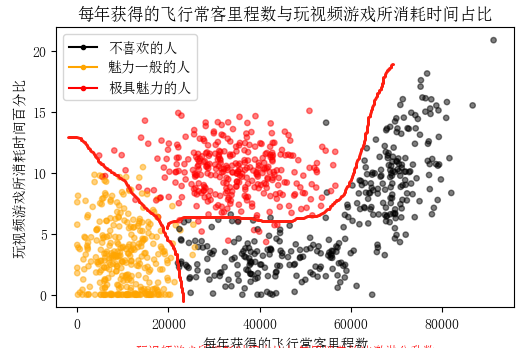

2. 在数据归一化的过程中，虽然可以很好地均衡各属性间的权重，这样就使得所有属性“人人平等”，但是这里需要考虑的是目标是否对所有属性一视同仁？会不会有特别的偏好性？所以，在处理具体的实际问题时，不同属性间的权重也应该加以考量。

3. 分类器算法中，是将单个测试样本扩展至与训练集相当的规模，然后进行“比较”（计算样本与训练集的欧氏“距离”）。这个操作的意义是将一个“未知的人”（测试集）与“已知的一群人”（训练集）去一一比较它们的特征，并做标记。将他们的特征值做差（相减），并以已知的人的标签标记他。这里可以理解为训练集就是一群评委，但是每个评委也没有那么称职，他只计算一下这个“未知的人”跟他自己有多相似，记录下相似值（欧氏距离）。也不管离他多远多近，评委自己是怎样的人，就评价“未知的人”是怎样的人。但是评委有这么多，最终的结果只有一个。那么这个最终结果怎么取呢？这也就是kNN算法的核心。首先将“评委们”记录的“距离”做个排序，然后取到前K个“评委”（训练集）的“评价”（标签），并将前面K个“评委”的“评价”进行计数。结果就采用“评价”次数最多的“评价”作为最终结果。

4. 无论直观的经验还是理论角度上讲，对于数据集的划分是很有讲究的。它将影响模型（这里就是指kNN算法）的“准确性”。由于这里的算法是《机器学习实战》中的例题，目的只是解释kNN算法的原理。所以作者采用了相对简单的方式，即前10%的数据作为测试集，其余的数据作为训练集。所以在测试分类器准确度的时候的错误率并不能准确地称之为模型的准确度，而只能叫作以数据集后90%数据作为训练器的KNN算法对于前10%的测试的匹配度。如果测试集数据与训练集数据的分布刚好有明显偏差，则“准确度”也会相应下降。因此除了改变K，以测试集数据、训练集数据的划分比例会改变“准确度”外，使用不同的方法取得的测试集与训练集也会影响模型的“准确性”。当然，所有的这些问题点，最根本的理论根基则在于机器学习遵守的两大定理：“NFL”（没有免费的午餐）及机器学习的一个前提假设是测试数据应当与训练集具有独立同分布的特性。